# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.88'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,187-1-126-reg1-A--Spectrum--015--Spec.Data 1_C...,103.932958,0.011419,1284.091131,0.010141,280.679513,1284.091131,818.540114,1.057252,3.512647,...,1.147458,1.142163,0.311800,0.007534,1.034335,1.081123,0.054677,0.002754,PseudoVoigtModel,PseudoVoigtModel
1,187-1-126-reg1-B--Spectrum--018--Spec.Data 1_C...,103.847901,0.018508,1284.296642,0.017209,110.212526,1284.296642,294.221991,1.036132,2.228181,...,1.276515,1.302949,0.573012,0.018802,1.006834,1.057627,0.010056,0.006112,PseudoVoigtModel,PseudoVoigtModel
2,187-1-126-reg1-C--Spectrum--022--Spec.Data 1_C...,103.813711,0.020218,1284.326163,0.018807,87.892458,1284.326163,235.579604,1.010454,1.682909,...,1.476190,1.271329,0.962338,0.022993,1.071090,1.029752,0.104200,0.007977,PseudoVoigtModel,PseudoVoigtModel
3,187-1-126-reg1-D--Spectrum--025--Spec.Data 1,103.925871,0.033480,1284.103912,0.032102,52.206288,1284.103912,151.656041,1.122043,1.542921,...,1.614035,1.375821,1.377947,0.042985,1.033493,1.073950,0.048086,0.012145,PseudoVoigtModel,PseudoVoigtModel
4,187-1-126-reg1-E--Spectrum--028--Spec.Data 1,103.926181,0.008316,1284.087295,0.007947,463.285063,1284.087295,1348.720090,1.081021,5.119045,...,1.133333,1.135773,0.288272,0.004667,1.048352,1.088710,0.075468,0.001587,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'FG', 'Cap','window','Video'],
 sort=True)
diad_meta[0]

'16 187-1-126-reg1-A--Spectrum--015--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 23/23 [00:00<00:00, 1279.89it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-126-reg1-A--Spectrum--015--Information.txt,"March 12, 2024\n",March,12.0,6.000,45.0,5.0,100.0,"['0h', '3m', '46s']",12:29:57 PM\n,44997.0,1325.004
1,187-1-126-reg1-B--Spectrum--018--Information.txt,"March 12, 2024\n",March,12.0,5.989,45.0,5.0,100.0,"['0h', '3m', '46s']",12:39:38 PM\n,45578.0,1325.004
2,187-1-126-reg1-C--Spectrum--022--Information.txt,"March 12, 2024\n",March,12.0,5.987,45.0,5.0,100.0,"['0h', '3m', '46s']",12:46:14 PM\n,45974.0,1325.004
3,187-1-126-reg1-D--Spectrum--025--Information.txt,"March 12, 2024\n",March,12.0,5.998,45.0,5.0,100.0,"['0h', '3m', '46s']",12:57:09 PM\n,46629.0,1325.004
4,187-1-126-reg1-E--Spectrum--028--Information.txt,"March 12, 2024\n",March,12.0,6.005,45.0,5.0,100.0,"['0h', '3m', '46s']",1:04:14 PM\n,47054.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-126-reg1-A--Spectrum--015--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-126-reg1-A--Spectrum--015',
       '187-1-126-reg1-B--Spectrum--018',
       '187-1-126-reg1-C--Spectrum--022',
       '187-1-126-reg1-D--Spectrum--025',
       '187-1-126-reg1-E--Spectrum--028',
       '187-1-126-reg1-F--Spectrum--031',
       '187-1-126-reg1-G--Spectrum--035',
       '187-1-126-reg1-H--Spectrum--039',
       '187-1-126-reg1-I--Spectrum--042',
       '187-1-126-reg1-J--Spectrum--045',
       '187-1-126-reg2-A--Spectrum--048',
       '187-1-126-reg2-B--Spectrum--052',
       '187-1-126-reg2-C--Spectrum--055',
       '187-1-126-reg3-A--Spectrum--058',
       '187-1-126-reg3-B--Spectrum--061',
       '187-1-126-reg3-C--Spectrum--065',
       '187-1-126-reg3-D--Spectrum--068',
       '187-1-126-reg4-A--Spectrum--072',
       '187-1-126-reg4-B--Spectrum--075',
       '187-1-126-reg4-B--Spectrum--076',
       '187-1-126-reg4-C--Spectrum--079',
       '187-1-126-reg5-A--Spectrum--083',
       '187-1-126-reg5-B--Spectrum--089'], dtype=object)

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-126-reg1-A--Spectrum--015--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-126-reg1-A--Spectrum--015',
       '187-1-126-reg1-B--Spectrum--018',
       '187-1-126-reg1-C--Spectrum--022',
       '187-1-126-reg1-D--Spectrum--025',
       '187-1-126-reg1-E--Spectrum--028',
       '187-1-126-reg1-F--Spectrum--031',
       '187-1-126-reg1-G--Spectrum--035',
       '187-1-126-reg1-H--Spectrum--039',
       '187-1-126-reg1-I--Spectrum--042',
       '187-1-126-reg1-J--Spectrum--045',
       '187-1-126-reg2-A--Spectrum--048',
       '187-1-126-reg2-B--Spectrum--052',
       '187-1-126-reg2-C--Spectrum--055',
       '187-1-126-reg3-A--Spectrum--058',
       '187-1-126-reg3-B--Spectrum--061',
       '187-1-126-reg3-C--Spectrum--065',
       '187-1-126-reg3-D--Spectrum--068',
       '187-1-126-reg4-A--Spectrum--072',
       '187-1-126-reg4-B--Spectrum--075',
       '187-1-126-reg4-B--Spectrum--076',
       '187-1-126-reg4-C--Spectrum--079',
       '187-1-126-reg5-A--Spectrum--083',
       '187-1-126-reg5-B--Spectrum--089'], dtype='<U44')

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-126-reg1-A--Spectrum--015,103.932958,0.011419,1284.091131,0.010141,280.679513,1284.091131,818.540114,1.057252,3.512647,...,March,12.0,6.000,45.0,5.0,100.0,"['0h', '3m', '46s']",12:29:57 PM\n,44997.0,1325.004
1,187-1-126-reg1-B--Spectrum--018,103.847901,0.018508,1284.296642,0.017209,110.212526,1284.296642,294.221991,1.036132,2.228181,...,March,12.0,5.989,45.0,5.0,100.0,"['0h', '3m', '46s']",12:39:38 PM\n,45578.0,1325.004
2,187-1-126-reg1-C--Spectrum--022,103.813711,0.020218,1284.326163,0.018807,87.892458,1284.326163,235.579604,1.010454,1.682909,...,March,12.0,5.987,45.0,5.0,100.0,"['0h', '3m', '46s']",12:46:14 PM\n,45974.0,1325.004
3,187-1-126-reg1-D--Spectrum--025,103.925871,0.033480,1284.103912,0.032102,52.206288,1284.103912,151.656041,1.122043,1.542921,...,March,12.0,5.998,45.0,5.0,100.0,"['0h', '3m', '46s']",12:57:09 PM\n,46629.0,1325.004
4,187-1-126-reg1-E--Spectrum--028,103.926181,0.008316,1284.087295,0.007947,463.285063,1284.087295,1348.720090,1.081021,5.119045,...,March,12.0,6.005,45.0,5.0,100.0,"['0h', '3m', '46s']",1:04:14 PM\n,47054.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    SO2_ratio=pf.calculate_CO2_SO2_ratio(peak_area_SO2=df_combo_sec_phase['Peak_Area_SO2'], 
peak_area_diad1=df_combo_sec_phase['Diad1_Voigt_Area'], peak_area_diad2=df_combo_sec_phase['Diad2_Voigt_Area'],
wavelength=532.067, T_K=37+273.15, efficiency_SO2=1, efficiency_CO2=0.5, 
sigma_SO2=4.03, sigma_CO2_v1=0.8, sigma_CO2_v2=1.23)
    df_combo_sec_phase['SO2_mol_ratio']=SO2_ratio['SO2']

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.3223977583269779e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-126-reg1-A--Spectrum--015,0.384079,0.005562,0.005042,0.002348,103.678149,0.011472,0.001362,0.011419,6.000,...,44997.0,NaN,NaN,NaN,NaN,NaN,44997.0,0.997548,0.997535,0.997561
1,187-1-126-reg1-B--Spectrum--018,0.346988,0.008345,0.008008,0.002349,103.593078,0.018513,0.001359,0.018508,5.989,...,45578.0,NaN,NaN,NaN,NaN,NaN,45578.0,0.997546,0.997533,0.997559
2,187-1-126-reg1-C--Spectrum--022,0.332217,0.009002,0.008690,0.002350,103.558823,0.020214,0.001358,0.020218,5.987,...,45974.0,NaN,NaN,NaN,NaN,NaN,45974.0,0.997545,0.997532,0.997558
3,187-1-126-reg1-D--Spectrum--025,0.380706,0.014856,0.014670,0.002348,103.670469,0.033425,0.001357,0.033480,5.998,...,46629.0,NaN,NaN,NaN,NaN,NaN,46629.0,0.997542,0.997529,0.997556
4,187-1-126-reg1-E--Spectrum--028,0.380776,0.004373,0.003689,0.002348,103.670628,0.008406,0.001356,0.008316,6.005,...,47054.0,NaN,NaN,NaN,NaN,NaN,47054.0,0.997541,0.997528,0.997554


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.3223977583269779e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-126-reg1-A--Spectrum--015,0.384079,0.005562,0.005042,0.002348,103.678149,0.011472,0.001362,0.011419,6.000,...,44997.0,NaN,NaN,NaN,NaN,NaN,44997.0,0.997548,0.997535,0.997561
1,187-1-126-reg1-B--Spectrum--018,0.346988,0.008345,0.008008,0.002349,103.593078,0.018513,0.001359,0.018508,5.989,...,45578.0,NaN,NaN,NaN,NaN,NaN,45578.0,0.997546,0.997533,0.997559
2,187-1-126-reg1-C--Spectrum--022,0.332217,0.009002,0.008690,0.002350,103.558823,0.020214,0.001358,0.020218,5.987,...,45974.0,NaN,NaN,NaN,NaN,NaN,45974.0,0.997545,0.997532,0.997558
3,187-1-126-reg1-D--Spectrum--025,0.380706,0.014856,0.014670,0.002348,103.670469,0.033425,0.001357,0.033480,5.998,...,46629.0,NaN,NaN,NaN,NaN,NaN,46629.0,0.997542,0.997529,0.997556
4,187-1-126-reg1-E--Spectrum--028,0.380776,0.004373,0.003689,0.002348,103.670628,0.008406,0.001356,0.008316,6.005,...,47054.0,NaN,NaN,NaN,NaN,NaN,47054.0,0.997541,0.997528,0.997554


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_March 12, 2024_fitted_2024-04-29.xlsx


## This helps visualize the errors on each spectra 

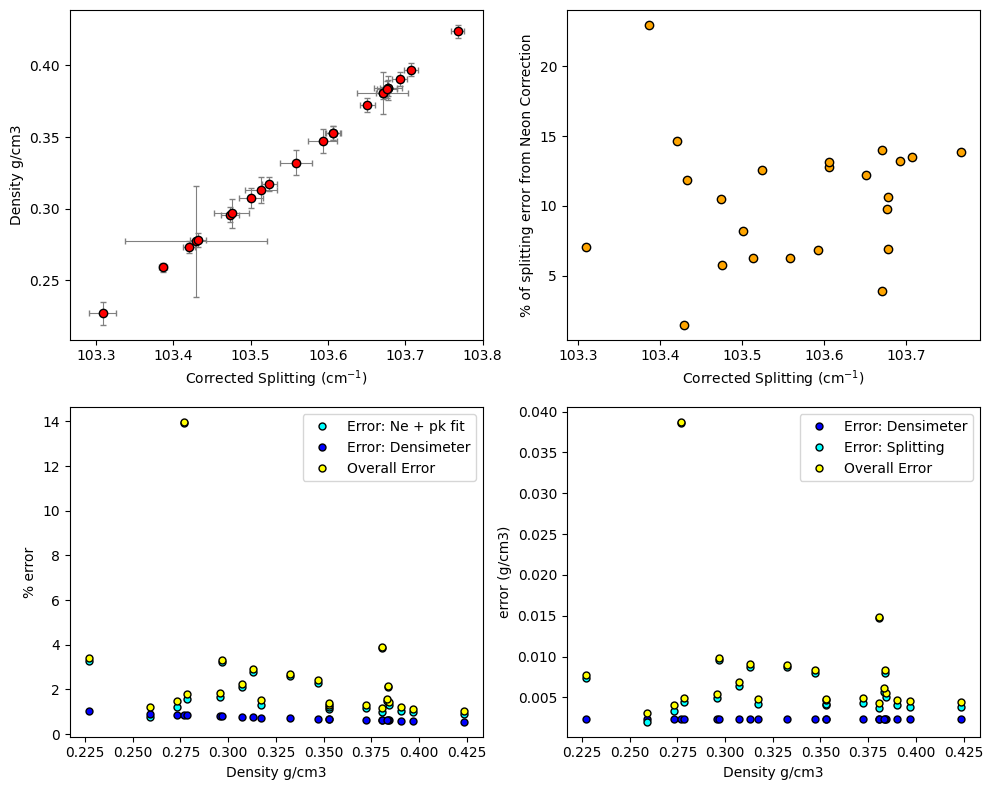

In [16]:
df=sorted_df
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

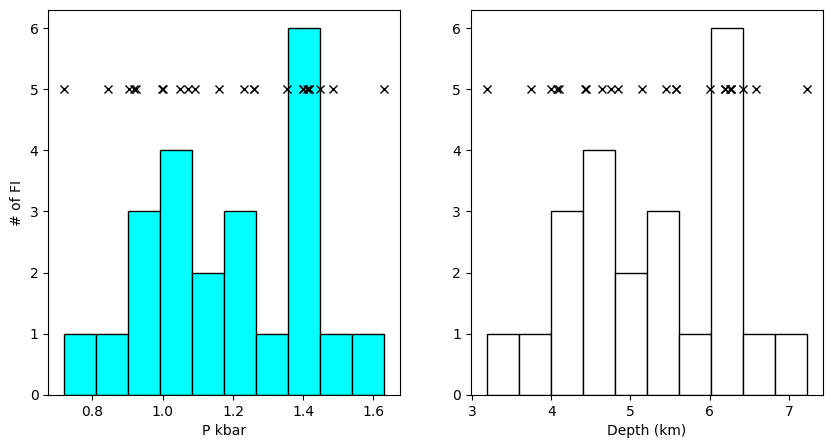

In [17]:
# Calculate pressure with a temperature estimate
Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')